In [7]:
from __future__ import absolute_import, division, print_function

import os

import tensorflow as tf
from tensorflow import keras
import numpy as np

tf.__version__

'1.9.0'

In [8]:
import os
import struct
def load_mnist_data(path='MNIST_data/'):
    """Load MNIST data from `path`"""
    Train_labels_path = os.path.join(path,'%s-labels.idx1-ubyte'% 'train')
    Train_images_path = os.path.join(path,'%s-images.idx3-ubyte'% 'train')
    Test_labels_path = os.path.join(path,'%s-labels.idx1-ubyte'% 't10k')
    Test_images_path = os.path.join(path,'%s-images.idx3-ubyte'% 't10k')
    #open(images_path)
    print(Train_labels_path)
    print(type(Train_labels_path))
    with open(Train_labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',lbpath.read(8))
        Y_train_orig = np.fromfile(lbpath,dtype=np.uint8)
    with open(Test_labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',lbpath.read(8))
        Y_test_orig = np.fromfile(lbpath,dtype=np.uint8)

    with open(Train_images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII',imgpath.read(16))
        X_train_orig = np.fromfile(imgpath,dtype=np.uint8).reshape(len(Y_train_orig), 784)
    with open(Test_images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII',imgpath.read(16))
        X_test_orig = np.fromfile(imgpath,dtype=np.uint8).reshape(len(Y_test_orig), 784)

    return X_train_orig, Y_train_orig, X_test_orig, Y_test_orig


In [10]:
train_images, train_labels, test_images, test_labels = load_mnist_data()

train_labels = train_labels[:1000]
test_labels = test_labels[:1000]

train_images = train_images[:1000].reshape(-1, 28 * 28) / 255.0
test_images = test_images[:1000].reshape(-1, 28 * 28) / 255.0

MNIST_data/train-labels.idx1-ubyte
<class 'str'>


In [24]:
print(train_labels.shape)
print(train_images.shape)
print(test_images.shape)
print(test_images[0].shape)

(1000,)
(1000, 784)
(1000, 784)
(784,)


In [16]:
# Returns a short sequential model
def create_model():
  model = tf.keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(784,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tf.nn.softmax)
  ])
  
  model.compile(optimizer=tf.keras.optimizers.Adam(), 
                loss=tf.keras.losses.sparse_categorical_crossentropy,
                metrics=['accuracy'])
  
  return model


# Create a basic model instance
model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


# train and save

In [ ]:


checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                 save_weights_only=True,
                                                 verbose=1)

model = create_model()

model.fit(train_images, train_labels,  epochs = 10, 
          validation_data = (test_images,test_labels),
          callbacks = [cp_callback])  # pass callback to training

In [19]:
!dir {checkpoint_dir}

 驱动器 D 中的卷是 work
 卷的序列号是 AE81-390C

 D:\li\python\AI\NeuralNetworks\Tensorflow\training_1 的目录

2018/09/11  11:07    <DIR>          .
2018/09/11  11:07    <DIR>          ..
2018/09/11  11:07                71 checkpoint
2018/09/11  11:07         1,631,720 cp.ckpt.data-00000-of-00001
2018/09/11  11:07               647 cp.ckpt.index
               3 个文件      1,632,438 字节
               2 个目录 236,000,215,040 可用字节


In [20]:
model = create_model()

loss, acc = model.evaluate(test_images, test_labels)
print("Untrained model, accuracy: {:5.2f}%".format(100*acc))

1000/1000 [==============================] - 0s 110us/step
Untrained model, accuracy: 14.90%


# restore

In [21]:
model.load_weights(checkpoint_path)
loss,acc = model.evaluate(test_images, test_labels)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

1000/1000 [==============================] - 0s 39us/step
Restored model, accuracy: 86.40%


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

(1, 10)


[[  1.91742511e-05   9.87547874e-01   5.44766756e-03   3.93518858e-04
    6.81851598e-05   7.72938292e-05   9.85181541e-04   3.83753399e-03
    1.25377509e-03   3.69676738e-04]]
[1]


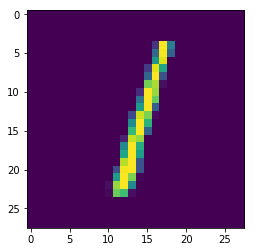

In [37]:
index=2
res = model.predict(test_images[index].reshape(1, 784))
print(res)
with tf.Session() as sess:
    print(sess.run(tf.argmax(res, 1)))
plt.imshow(test_images[index].reshape(28,28))

# Save entire model to a HDF5 file

In [40]:
model.save('my_model.h5')

# Recreate the exact same model, including weights and optimizer.

In [42]:
new_model = keras.models.load_model('my_model.h5')
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [43]:
loss, acc = new_model.evaluate(test_images, test_labels)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

1000/1000 [==============================] - 0s 126us/step
Restored model, accuracy: 86.40%
